In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [79]:
# constants and masses
G = (6.67430 * 10e-11) #Gravitational const. in AU^3 * SolarMass * Day^-2
Me = (5.9724 * 10e26) #Mass of the earth

# To make calculations easier we will non-dimensionalize
# Reference Quantities
m_r = 1.988500 * 10e30 #Solar mass [kg]
r_r = 149597870700 #Astronomic Unit [m]
t_r = (60*60*24) #a day
v_r = 29780 # avg. velocity of earth  

#scaled constants
K1 = G*t_r*m_r/(r_r**2*v_r)
K2 = v_r*t_r/r_r

In [62]:
#masses
m1 = 1
m2 = Me/m_r
# initial position and velocities
r1 = [0,0,0]
r2 = [1,0,0]
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")

v1 = [0,0,0]
v2 = [0.01,0.99,0]
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")
# Center of mass and velocity of COM
r_com = (m1*r1 + m2*r2)/(m1+m2)
v_com = (m1*v1+m2+v2)/(m1+m2)

In [69]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]    
    
    r=np.linalg.norm(r2-r1) #Calculate magnitude or norm of vector    
    
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2    
    r_derivs=np.concatenate((dr1bydt,dr2bydt))
    derivs=np.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [86]:
init_params=np.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=np.linspace(0,20,1000) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
two_body_sol=scipy.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

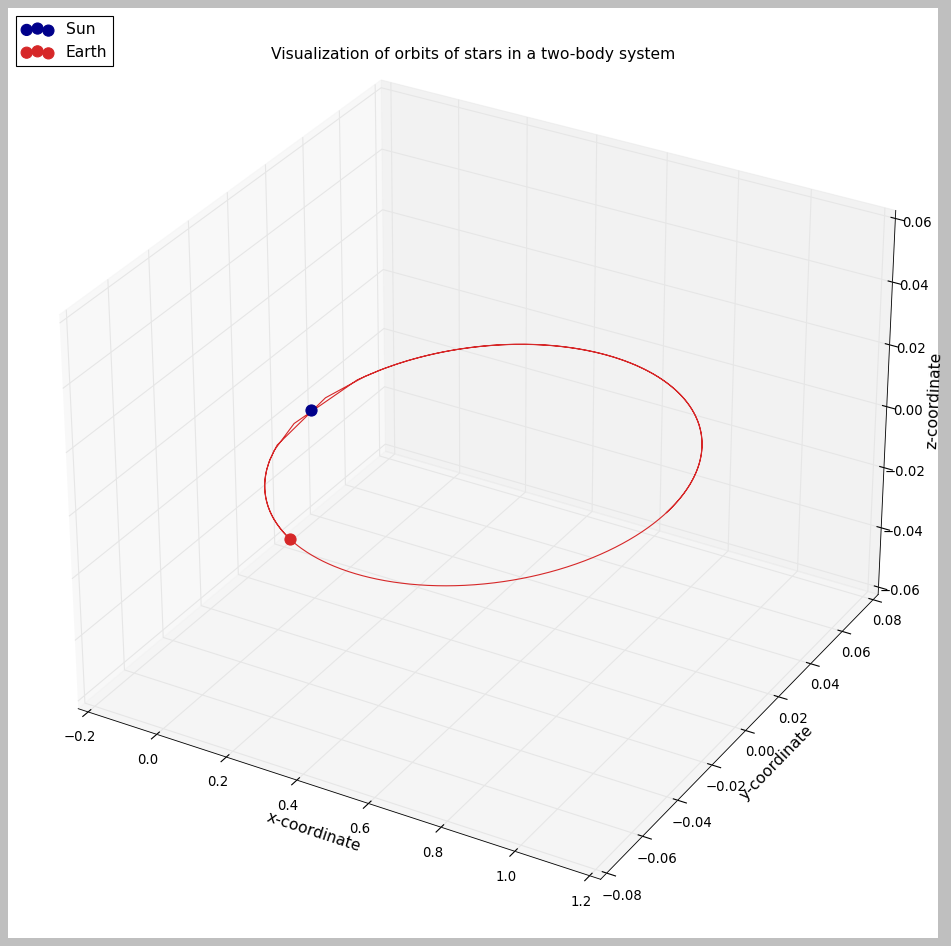

In [87]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

#Create figure
fig=plt.figure(figsize=(15,15))#Create 3D axes
ax=fig.add_subplot(111,projection="3d")#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Sun")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Earth")#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)